In [ ]:
from PIL import Image
import glob
import os, io
import numpy as np
from skimage import color
#from skimage import io
import skimage
from skimage.transform import resize
from skimage.color import rgb2hsv
import matplotlib.pyplot as plt 
from urllib.request import urlopen
from zipfile import ZipFile
import shutil

folders = ["pics/blonde/blonde*jpg", "pics/brunette/brown*jpg", "pics/redheads/red*jpg"]
X =[]
Y = []
imgs_with_channel = []

# needed to download pics for this example
def download_files (repository, directory_to_download):
 
    # go to github repository
    http_response = urlopen(repository)
    zipfile = ZipFile(io.BytesIO(http_response.read()))
    files = zipfile.namelist()
    for file in files:
        if directory_to_download in file:
            outfile = file[file.find (directory_to_download):]
            outdir = os.path.dirname (outfile)
            if not os.path.exists (outdir):
                os.makedirs (outdir, exist_ok=True)
            if not file.endswith ("/"):
              #  print (file)
              #  print (outfile)
                zipfile.extract (file, ".")
                shutil.copy (file, outfile)
            
    
repository = "https://github.com/pauline-ng/holmes/archive/refs/heads/master.zip"
directory_to_download = "pics/"

download_files(repository, directory_to_download)

In [ ]:
from skimage import io as skimage_io

# assign jpg_files all of the hair-colored jpgs
jpg_files = []
for folder in folders:
    jpg_files.extend (glob.glob (folder))

training_data = []
IMG_SIZE = 50

for jpg_file in jpg_files:
    label = os.path.basename (jpg_file).replace (".jpg", "")
    label = ''.join([i for i in label if not i.isdigit()]) 

    im = Image.open(jpg_file) # Can be many different formats.

    IMG_PX_SIZE = 20 # pixels
    rgb_img = skimage_io.imread (jpg_file)
    

    rgb_img = resize (rgb_img, (IMG_PX_SIZE,IMG_PX_SIZE))
  
    X.append (rgb_img.reshape (1, IMG_PX_SIZE*IMG_PX_SIZE*3)[0]) # flatten into a 1-D array
    Y.append (label)
    


In [ ]:

from sklearn.neighbors import KNeighborsClassifier
#from sklearn.preprocessing import LabelEncoder





In [ ]:
num_groups = 3  # blonde, red, brunette

model = KNeighborsClassifier(n_neighbors=num_groups)

model.fit (X, Y)


KNeighborsClassifier(n_neighbors=3)

prediction = model.predict (X)

In [ ]:
print (model.predict (X))

['blonde' 'blonde' 'red' 'blonde' 'blonde' 'blonde' 'blonde' 'blonde'
 'red' 'blonde' 'brown' 'brown' 'brown' 'brown' 'brown' 'brown' 'brown'
 'brown' 'brown' 'brown' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red'
 'red' 'red' 'red' 'red' 'red']


In [ ]:
#print "generated examples to predict:\n",predict,"\n"
# predict class probabilities for each class for each value and convert to DataFrame
probs = model.predict_proba(X)
#print ("all probabilities:\n", probs, "\n")
for index, prob in enumerate (probs):
    jpg_file = jpg_files[index]
    print (jpg_file)
    print (str(prob))


red1 has a component of blonde in it, not truly red


handles
[<matplotlib.collections.PathCollection object at 0x7f6d42e0f7d0>, <matplotlib.collections.PathCollection object at 0x7f6d43936510>, <matplotlib.collections.PathCollection object at 0x7f6d42da4f50>]
['blonde', 'brown', 'red']


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


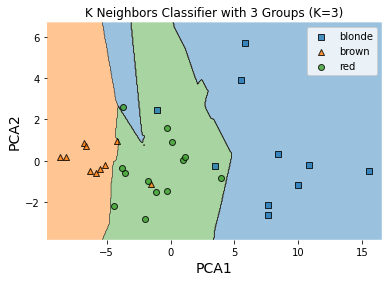

In [ ]:

# visualization

from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# turn red, blonde, brown hair labels into integers so sklearn can read it
label_encoder = LabelEncoder()
label_encoder.fit (Y)
Y_encoded = label_encoder.transform(Y)
le_name_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

# for plotting, get the 2 most important PCA components
pca = PCA(n_components = 2)
X_2 = pca.fit_transform(X)
model.fit(X_2, Y_encoded)

#clf is the classifier object
plot_decision_regions(X_2, Y_encoded, clf=model, legend=2)
print ("handles")
print (handles)
handles, labels =  plt.gca().get_legend_handles_labels()
print (list(map(le_name_mapping.get, [int(i) for i in le_name_mapping])))
plt.legend(handles, list(map(le_name_mapping.get, [int(i) for i in le_name_mapping])))


plt.xlabel("PCA1", size=14)
plt.ylabel("PCA2", size=14)
plt.title("K Neighbors Classifier with 3 Groups (K=3)")
plt.show()


